### **Student Performance Analysis**

1. **Load Dataset**

   • Load the “Students Performance” dataset (available on Kaggle or UCI).

2. **Preprocess the Data**

   • Drop columns like student ID or parental level of education if irrelevant.

   • Encode categorical columns (e.g., gender, race) using one-hot encoding.

   • Fill missing test scores with mean.

3. **EDA**

   • Analyze average math score by gender or lunch type.

   • Provide one insight (e.g., effect of test preparation course on scores).

4. **Model Training**

   • Predict whether a student will pass math (>50 marks) using logistic regression.

   • Ensure no use of loops — vectorize.
   
   • Train/test split (80/20).

   • Output model accuracy.



In [ ]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df=pd.read_csv('C:/Users/USER/Documents/Github/Machine Learning/datasets/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
# here we are replacing spaces  with _


In [82]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [83]:
df.drop(['parental_level_of_education'],axis=1,inplace=True)
df.head()

,gender,race/ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75


In [84]:
le=LabelEncoder()
df['gender_enc']=le.fit_transform(df['gender'])

In [85]:
df.head()

,gender,race/ethnicity,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_enc
0,female,group B,standard,none,72,72,74,0
1,female,group C,standard,completed,69,90,88,0
2,female,group B,standard,none,90,95,93,0
3,male,group A,free/reduced,none,47,57,44,1
4,male,group C,standard,none,76,78,75,1


In [86]:
df=pd.get_dummies(df,columns=['race/ethnicity'],drop_first=True)

In [87]:
df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_enc,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,standard,none,72,72,74,0,True,False,False,False
1,female,standard,completed,69,90,88,0,False,True,False,False
2,female,standard,none,90,95,93,0,True,False,False,False
3,male,free/reduced,none,47,57,44,1,False,False,False,False
4,male,standard,none,76,78,75,1,False,True,False,False


In [88]:
average_math=df.groupby('gender')['math_score'].mean()

print(average_math)

gender
female    63.633205
male      68.728216
Name: math_score, dtype: float64


In [89]:
df['total_score']=df[['math_score','reading_score','writing_score']].sum(axis=1)
df.head()


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_enc,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,total_score
0,female,standard,none,72,72,74,0,True,False,False,False,218
1,female,standard,completed,69,90,88,0,False,True,False,False,247
2,female,standard,none,90,95,93,0,True,False,False,False,278
3,male,free/reduced,none,47,57,44,1,False,False,False,False,148
4,male,standard,none,76,78,75,1,False,True,False,False,229


<Axes: xlabel='test_preparation_course', ylabel='total_score'>

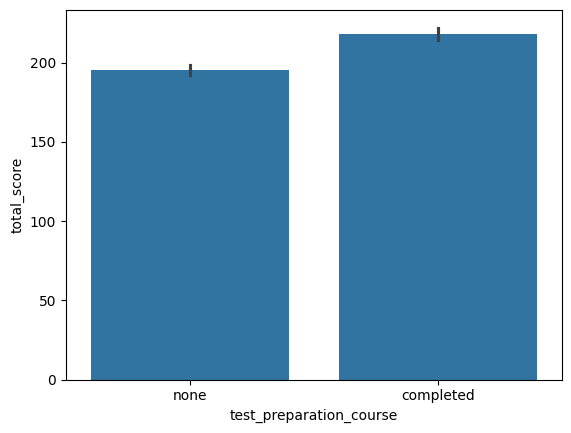

In [90]:
sns.barplot(data=df,x='test_preparation_course',y='total_score',estimator='mean')

In [91]:
df['maths_pass']=(df['math_score']>50).astype(int)
df.head()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_enc,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,total_score,maths_pass
0,female,standard,none,72,72,74,0,True,False,False,False,218,1
1,female,standard,completed,69,90,88,0,False,True,False,False,247,1
2,female,standard,none,90,95,93,0,True,False,False,False,278,1
3,male,free/reduced,none,47,57,44,1,False,False,False,False,148,0
4,male,standard,none,76,78,75,1,False,True,False,False,229,1


In [92]:
df.drop(['gender','lunch','test_preparation_course'],axis=1,inplace=True)


In [93]:
df.head()

,math_score,reading_score,writing_score,gender_enc,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,total_score,maths_pass
0,72,72,74,0,True,False,False,False,218,1
1,69,90,88,0,False,True,False,False,247,1
2,90,95,93,0,True,False,False,False,278,1
3,47,57,44,1,False,False,False,False,148,0
4,76,78,75,1,False,True,False,False,229,1


In [94]:


tar_col=['math_score', 'reading_score', 'writing_score', 'total_score','maths_pass']

X=df.drop(tar_col,axis=1)
y=df['maths_pass']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=11)

model=LogisticRegression(max_iter=100)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy )


Accuracy:  0.865
